**Name:** Rafael Henrique Martello

**Date**: 05-10-21

# Assignment 3 - Exploratory Data Analysis (EDA)

When you first get your data, it’s very tempting to immediately begin fitting models and assessing how they perform. However, before you begin modeling, it’s absolutely essential to explore the structure of the data and the relationships between the variables in the data set.

Do a detailed EDA of the **ames_train** data set, to learn about the structure of the data and the relationships between the variables in the data set . Your EDA should involve creating and reviewing many plots/graphs and considering the patterns and relationships you see.

You may find out that the data could use some cleaning.

After you have explored completely, make sure you create at least four graphs/plots that you found most informative during your EDA process, and briefly explain what you learned from each (why you found each informative).

PS: notice that the first column is in index, you might not need to import it

### Important:

You may use any libraries you want. However a 'requirements.txt' file is expected, so that the necessary dependencies can be installed in a virtual environment using the command 'pip install requirements.txt'

In [1]:
!pip install -r requirements.txt

In [2]:
#import some necessary librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew


from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

In [3]:
# Load datasets
df_train = pd.read_csv('Data_A3/ames_train.csv', sep=';')
df_test = pd.read_csv('Data_A3/ames_test.csv', sep=';')

In [4]:
# Remove the first column
df_train = df_train.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)

In [5]:
df_train.shape, df_test.shape

((1000, 81), (817, 81))

## **Exploratory Data Analysis (EDA)**


### Target Variable(Price):

In [6]:
#descriptive statistics summary
df_train['price'].describe()

count      1000.000000
mean     181190.076000
std       81909.787799
min       12789.000000
25%      129762.500000
50%      159467.000000
75%      213000.000000
max      615000.000000
Name: price, dtype: float64


 mi = 181.19 and sigma = 81.87



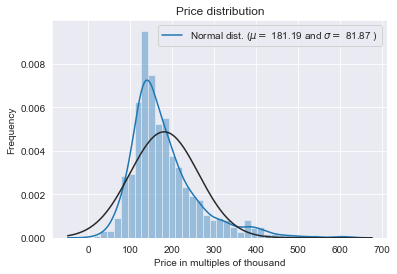

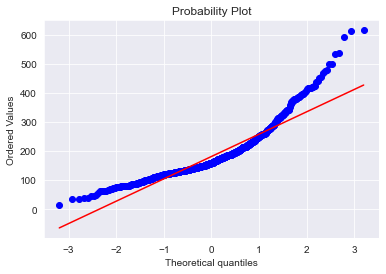

In [7]:
sns.distplot(df_train['price']/1000, fit=norm);
plt.xlabel('Price in multiples of thousand')
# Get the fitted parameters used by the function
(mi, sigma) = norm.fit(df_train['price']/1000)
print( '\n mi = {:.2f} and sigma = {:.2f}\n'.format(mi, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mi, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['price']/1000, plot=plt)
plt.show()


In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['price'].skew()) ## Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
print("Kurtosis: %f" % df_train['price'].kurt()) ## Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

Skewness: 1.631167
Kurtosis: 3.755699


### Price and Relationship with numerical variables

In [9]:
train_stats=df_train.describe()
train_stats=train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
PID,1000.0,40499.500000,288.819436,40000.0,40249.75,40499.5,40749.25,40999.0
area,1000.0,1476.615000,505.174189,334.0,1092.00,1411.0,1743.25,4676.0
price,1000.0,181190.076000,81909.787799,12789.0,129762.50,159467.0,213000.00,615000.0
MS.SubClass,1000.0,57.150000,43.020673,20.0,20.00,50.0,70.00,190.0
Lot.Frontage,833.0,69.214886,24.285327,21.0,57.00,69.0,80.00,313.0
Lot.Area,1000.0,10352.406000,9827.841077,1470.0,7314.00,9317.0,11649.75,215245.0
Overall.Qual,1000.0,6.095000,1.412788,1.0,5.00,6.0,7.00,10.0
Overall.Cond,1000.0,5.559000,1.089820,1.0,5.00,5.0,6.00,9.0
Year.Built,1000.0,1972.203000,29.637412,1872.0,1955.00,1975.0,2001.00,2010.0
Year.Remod.Add,1000.0,1984.338000,20.557489,1950.0,1966.00,1992.5,2004.00,2010.0


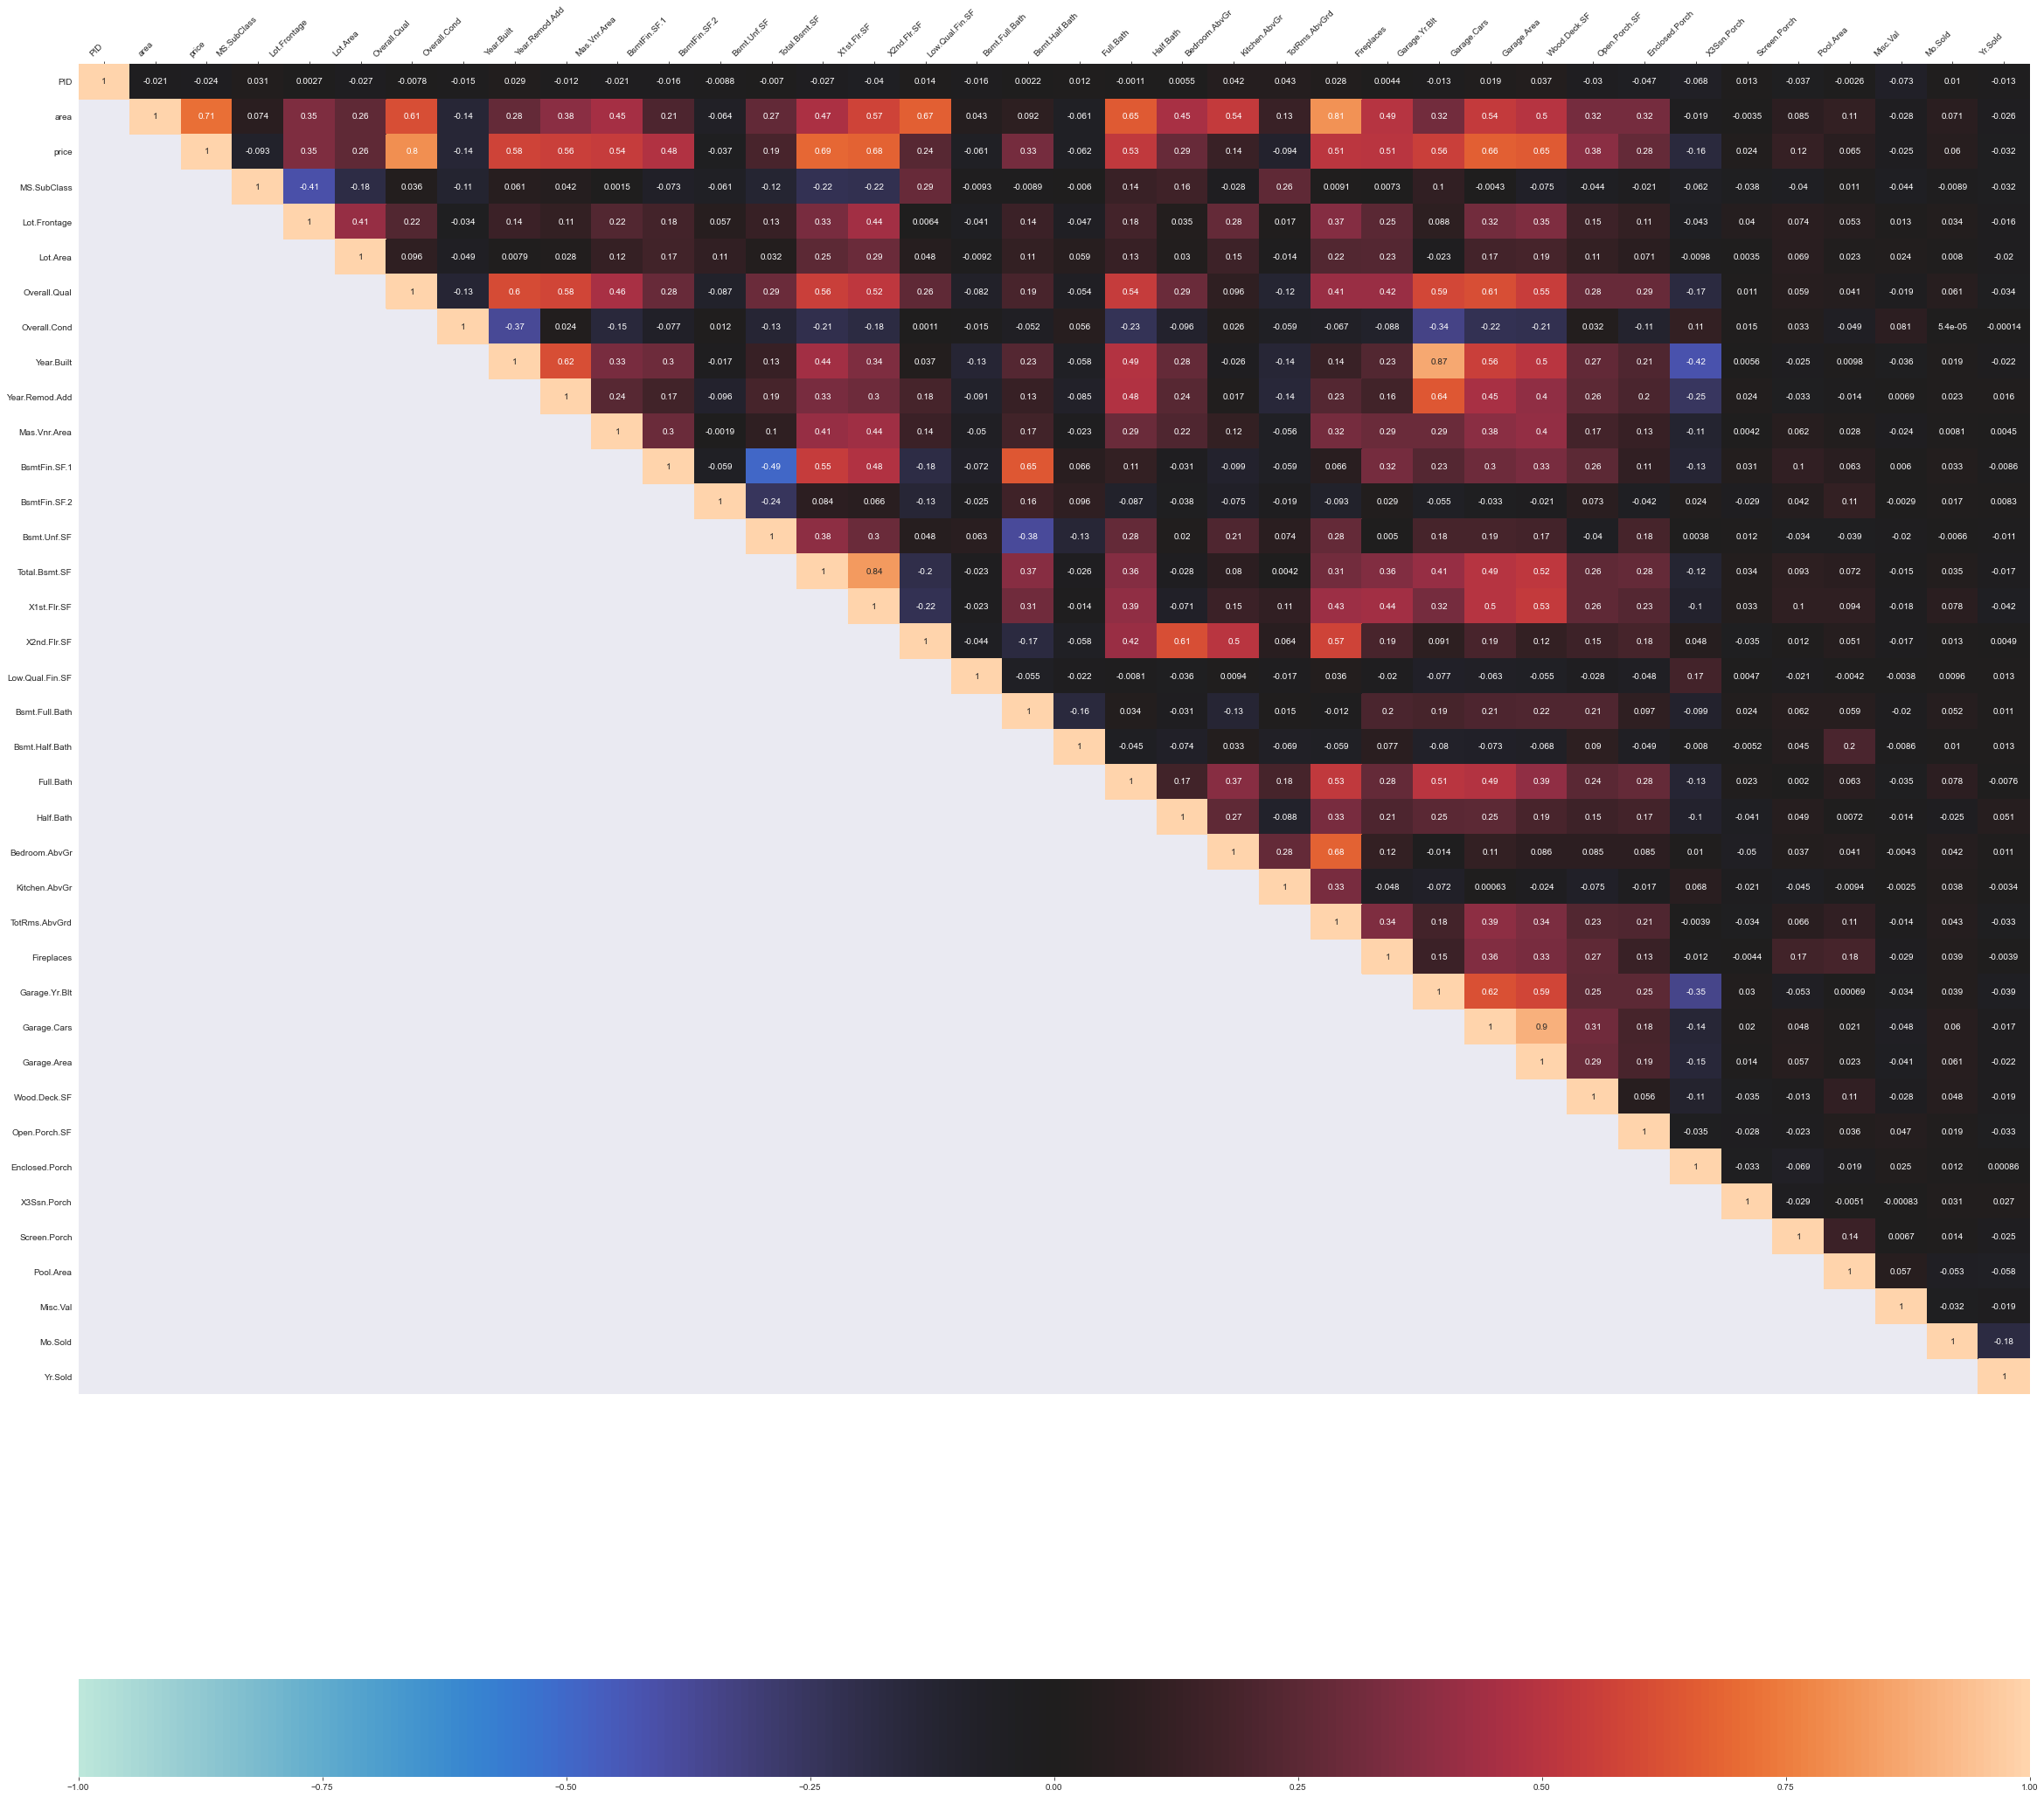

In [10]:
corrMatrix = df_train.corr(method='pearson')
mask = np.tri(corrMatrix.shape[0], k=-1)



ax = plt.subplots(figsize=(40, 40))
ax = sns.heatmap(
    corrMatrix,
    mask=mask,
    cbar_kws= {'orientation': 'horizontal'},
    annot=True, 
    vmin=-1, vmax=1, center=0,

)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




> According to our correlation matrix, these are the variables most correlated with 'price':



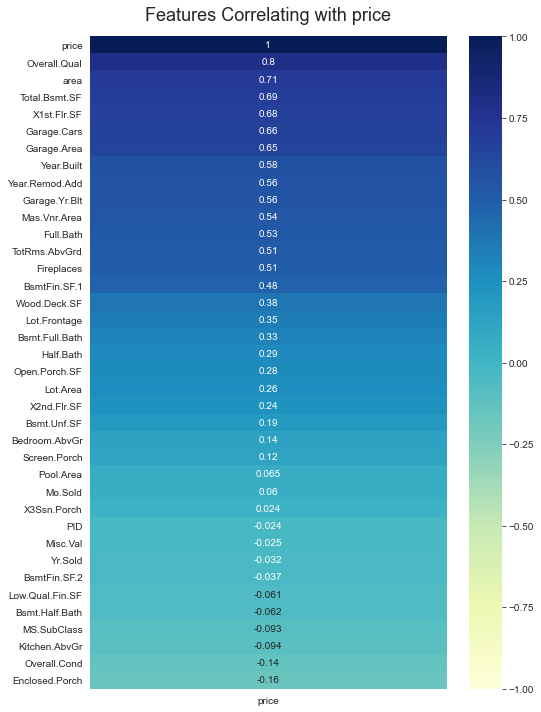

In [11]:
# Correlation for price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrMatrix[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);

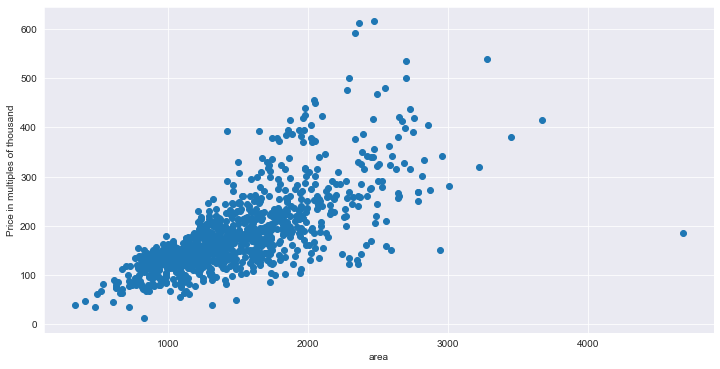

In [12]:

# Showing The area influence over price

plt.figure(figsize=(12,6))
plt.scatter(x=df_train['area'], y=df_train['price']/1000)
plt.ylabel('Price in multiples of thousand')
plt.xlabel('area')
plt.show()

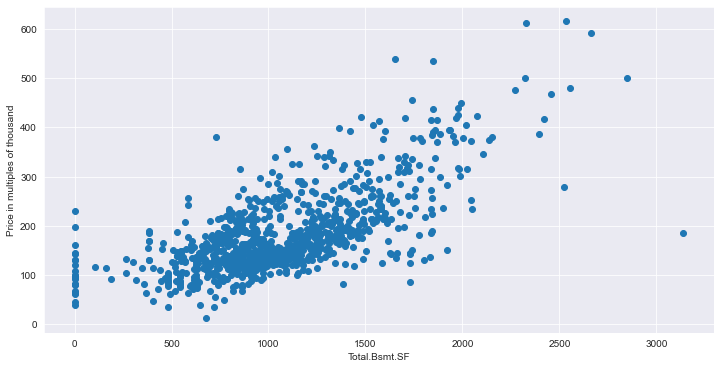

In [13]:
# Showing The Total.Bsmt.SF influence over price

plt.figure(figsize=(12,6))
plt.scatter(x=df_train['Total.Bsmt.SF'], y=df_train['price']/1000)
plt.ylabel('Price in multiples of thousand')
plt.xlabel('Total.Bsmt.SF')
plt.show()

### Price and Relationship with categorical features



> As seen in the correlation matrix, a categorical variable of extreme importance for the price is the Overall.



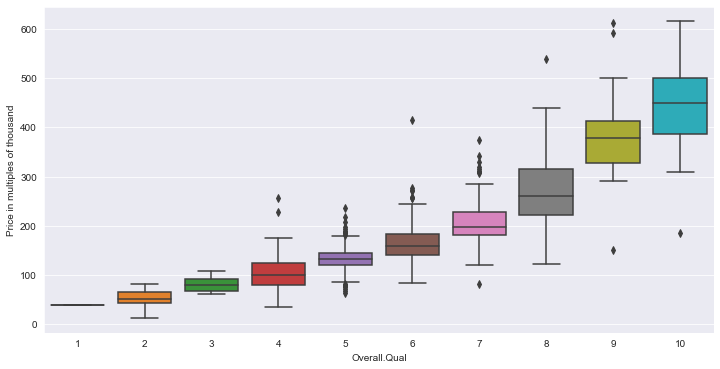

In [14]:
# Showing The Overall.Qual influence over price
grouped = df_train.loc[:,['Overall.Qual', 'price']] \
    .groupby(['Overall.Qual']) \
    .median() \
    .sort_values(by='price')

plt.figure(figsize=(12,6))
sns.boxplot(x=df_train['Overall.Qual'], y=df_train['price']/1000, order=grouped.index)
plt.ylabel('Price in multiples of thousand')
plt.show()


> As we are analyzing the quality, we can check the relationship of the Bsmt.Qual and Kitchen.Qual variables


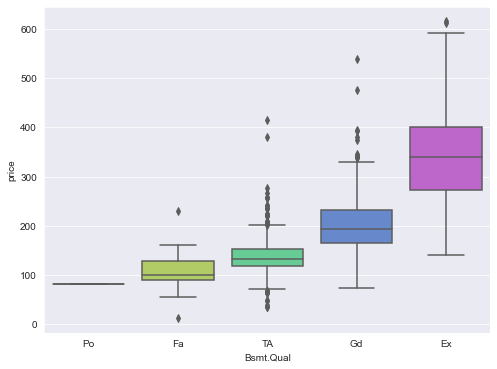

In [15]:
# Evaluating the prices by basement quality: 

grouped = df_train.loc[:,['Bsmt.Qual', 'price']] \
    .groupby(['Bsmt.Qual']) \
    .median() \
    .sort_values(by='price')

plt.figure(figsize=(8,6))
sns.boxplot(x=df_train['Bsmt.Qual'], y=df_train['price']/1000, order=grouped.index, palette="hls")

plt.show()

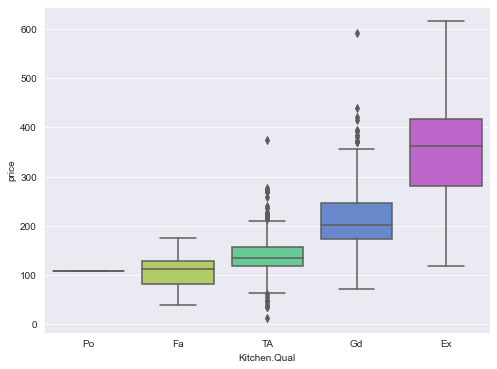

In [16]:
# Evaluating the prices by Kitchen quality: 

grouped = df_train.loc[:,['Kitchen.Qual', 'price']] \
    .groupby(['Kitchen.Qual']) \
    .median() \
    .sort_values(by='price')

plt.figure(figsize=(8,6))
sns.boxplot(x=df_train['Kitchen.Qual'], y=df_train['price']/1000, order=grouped.index, palette="hls")

plt.show()


> For the three graphs we have a tendency to increase the price with quality, a correlation that is logical when we imagine the acquisition of a property.Other logical correlations that we can highlight are the neighborhood and the year of construction of the property, as follow:


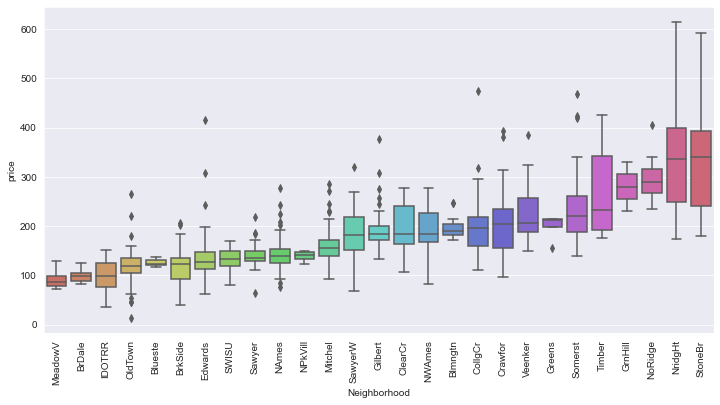

In [17]:
# Evaluating the prices by Neighborhood: 
grouped = df_train.loc[:,['Neighborhood', 'price']] \
    .groupby(['Neighborhood']) \
    .median() \
    .sort_values(by='price')

plt.figure(figsize=(12,6))
sns.boxplot(x=df_train['Neighborhood'], y=df_train['price']/1000, order=grouped.index, palette="hls")
plt.xticks(rotation=90);
plt.show()

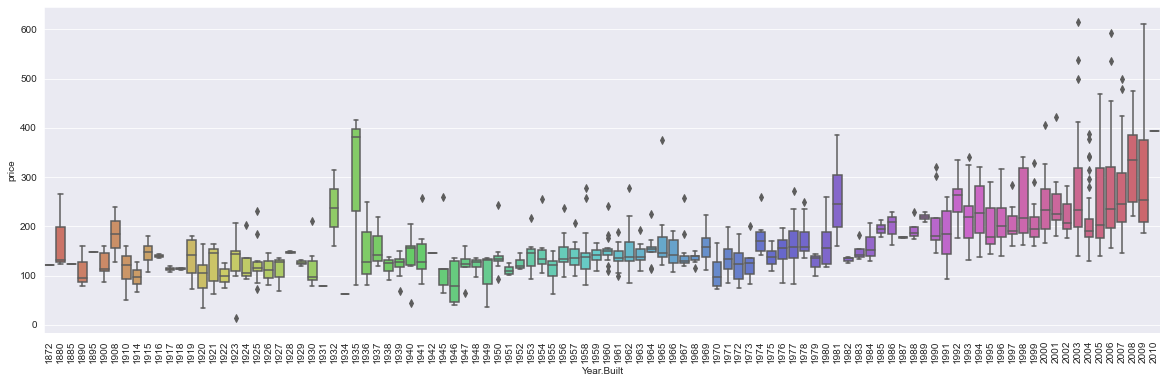

In [18]:
# Evaluating the prices by Neighborhood: 
grouped = df_train.loc[:,['Year.Built', 'price']] \
    .groupby(['Year.Built']) \
    .median() \
    .sort_values(by='Year.Built')

plt.figure(figsize=(20,6))
sns.boxplot(x=df_train['Year.Built'], y=df_train['price']/1000, order=grouped.index, palette="hls")
plt.xticks(rotation=90);
plt.show()



> As it is common knowledge, cities have neighborhoods with different levels of safety and quality of life, so this is an essential factor in setting the price of a property. The year of construction of the property is also important, in most cases newer properties have a higher price, with some exceptions that can be noted throughout the boxplot.



### Showing high correlated variables and price in Scatterplot:

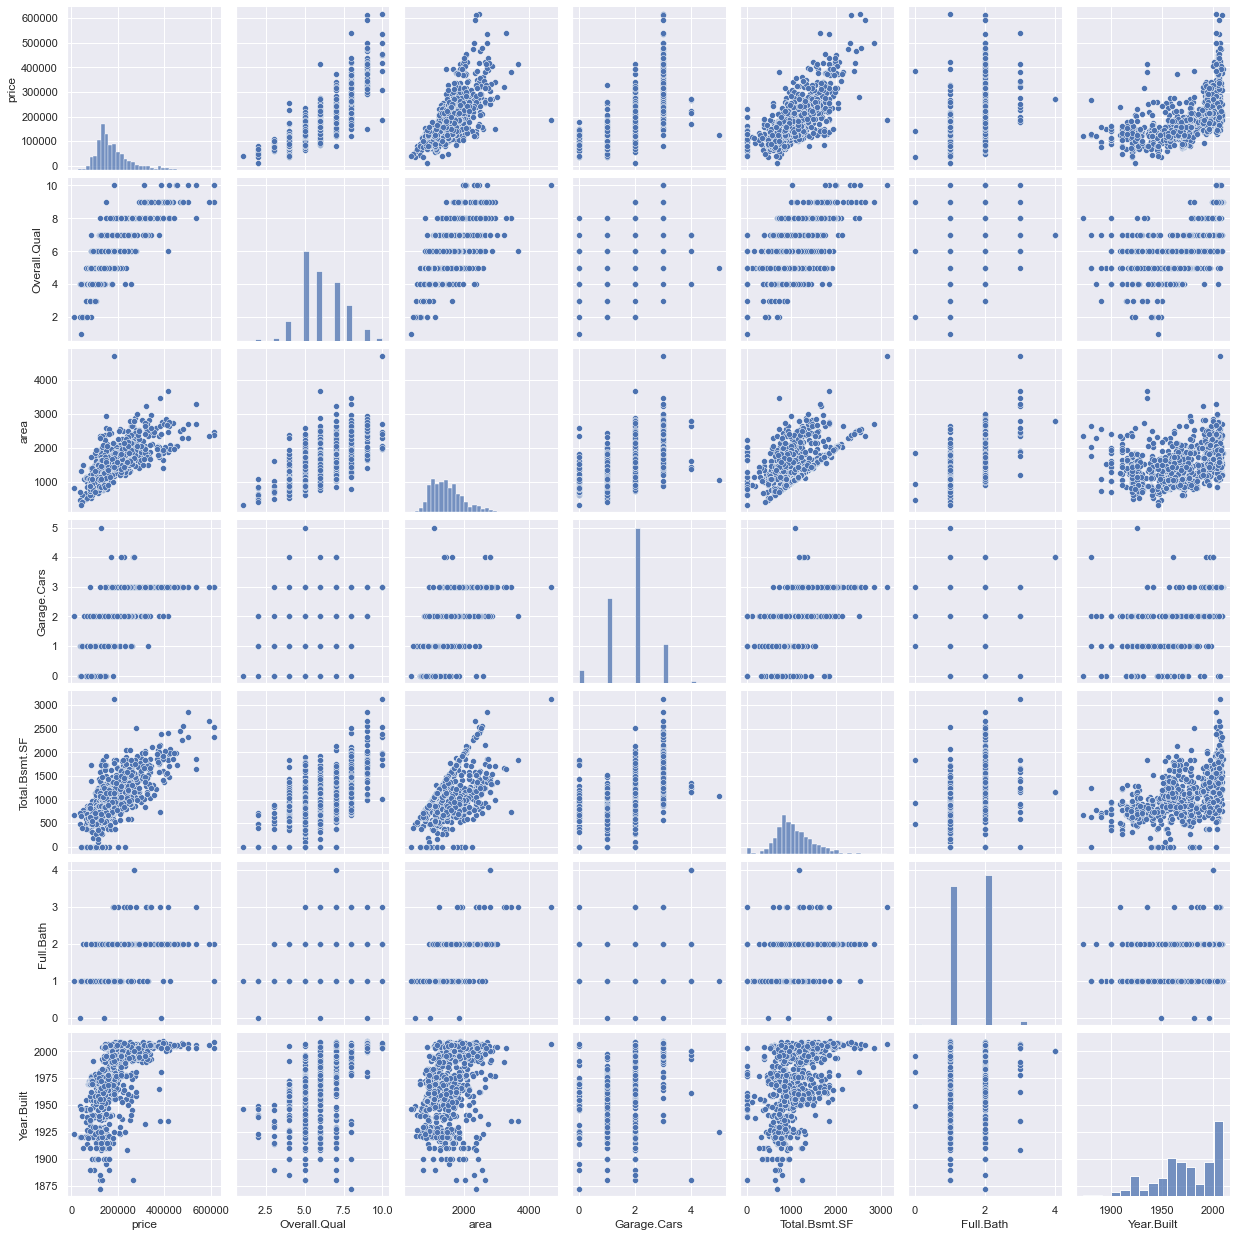

In [19]:
#scatterplot
sns.set()
cols = ['price', 'Overall.Qual', 'area', 'Garage.Cars', 'Total.Bsmt.SF', 'Full.Bath', 'Year.Built']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

>  Although we have already seen some of the graphs shown in the previous set, the scatter plots can gives us a reasonable idea about variables relationships.
>  *   The first figure we may find interesting is the one between 'Total.Bsmt.SF' and 'area'. The dots draw a line that makes sense when we imagine that a basement will normally not be larger than the upper floor.
>  *   The plot of 'price' and 'Year.Built' also has some interesting features. Presenting a behavior very close to an exponential function, with the prices of new houses tending to a higher price. 


## **Graphics and explanation:**

### Correlation Matix

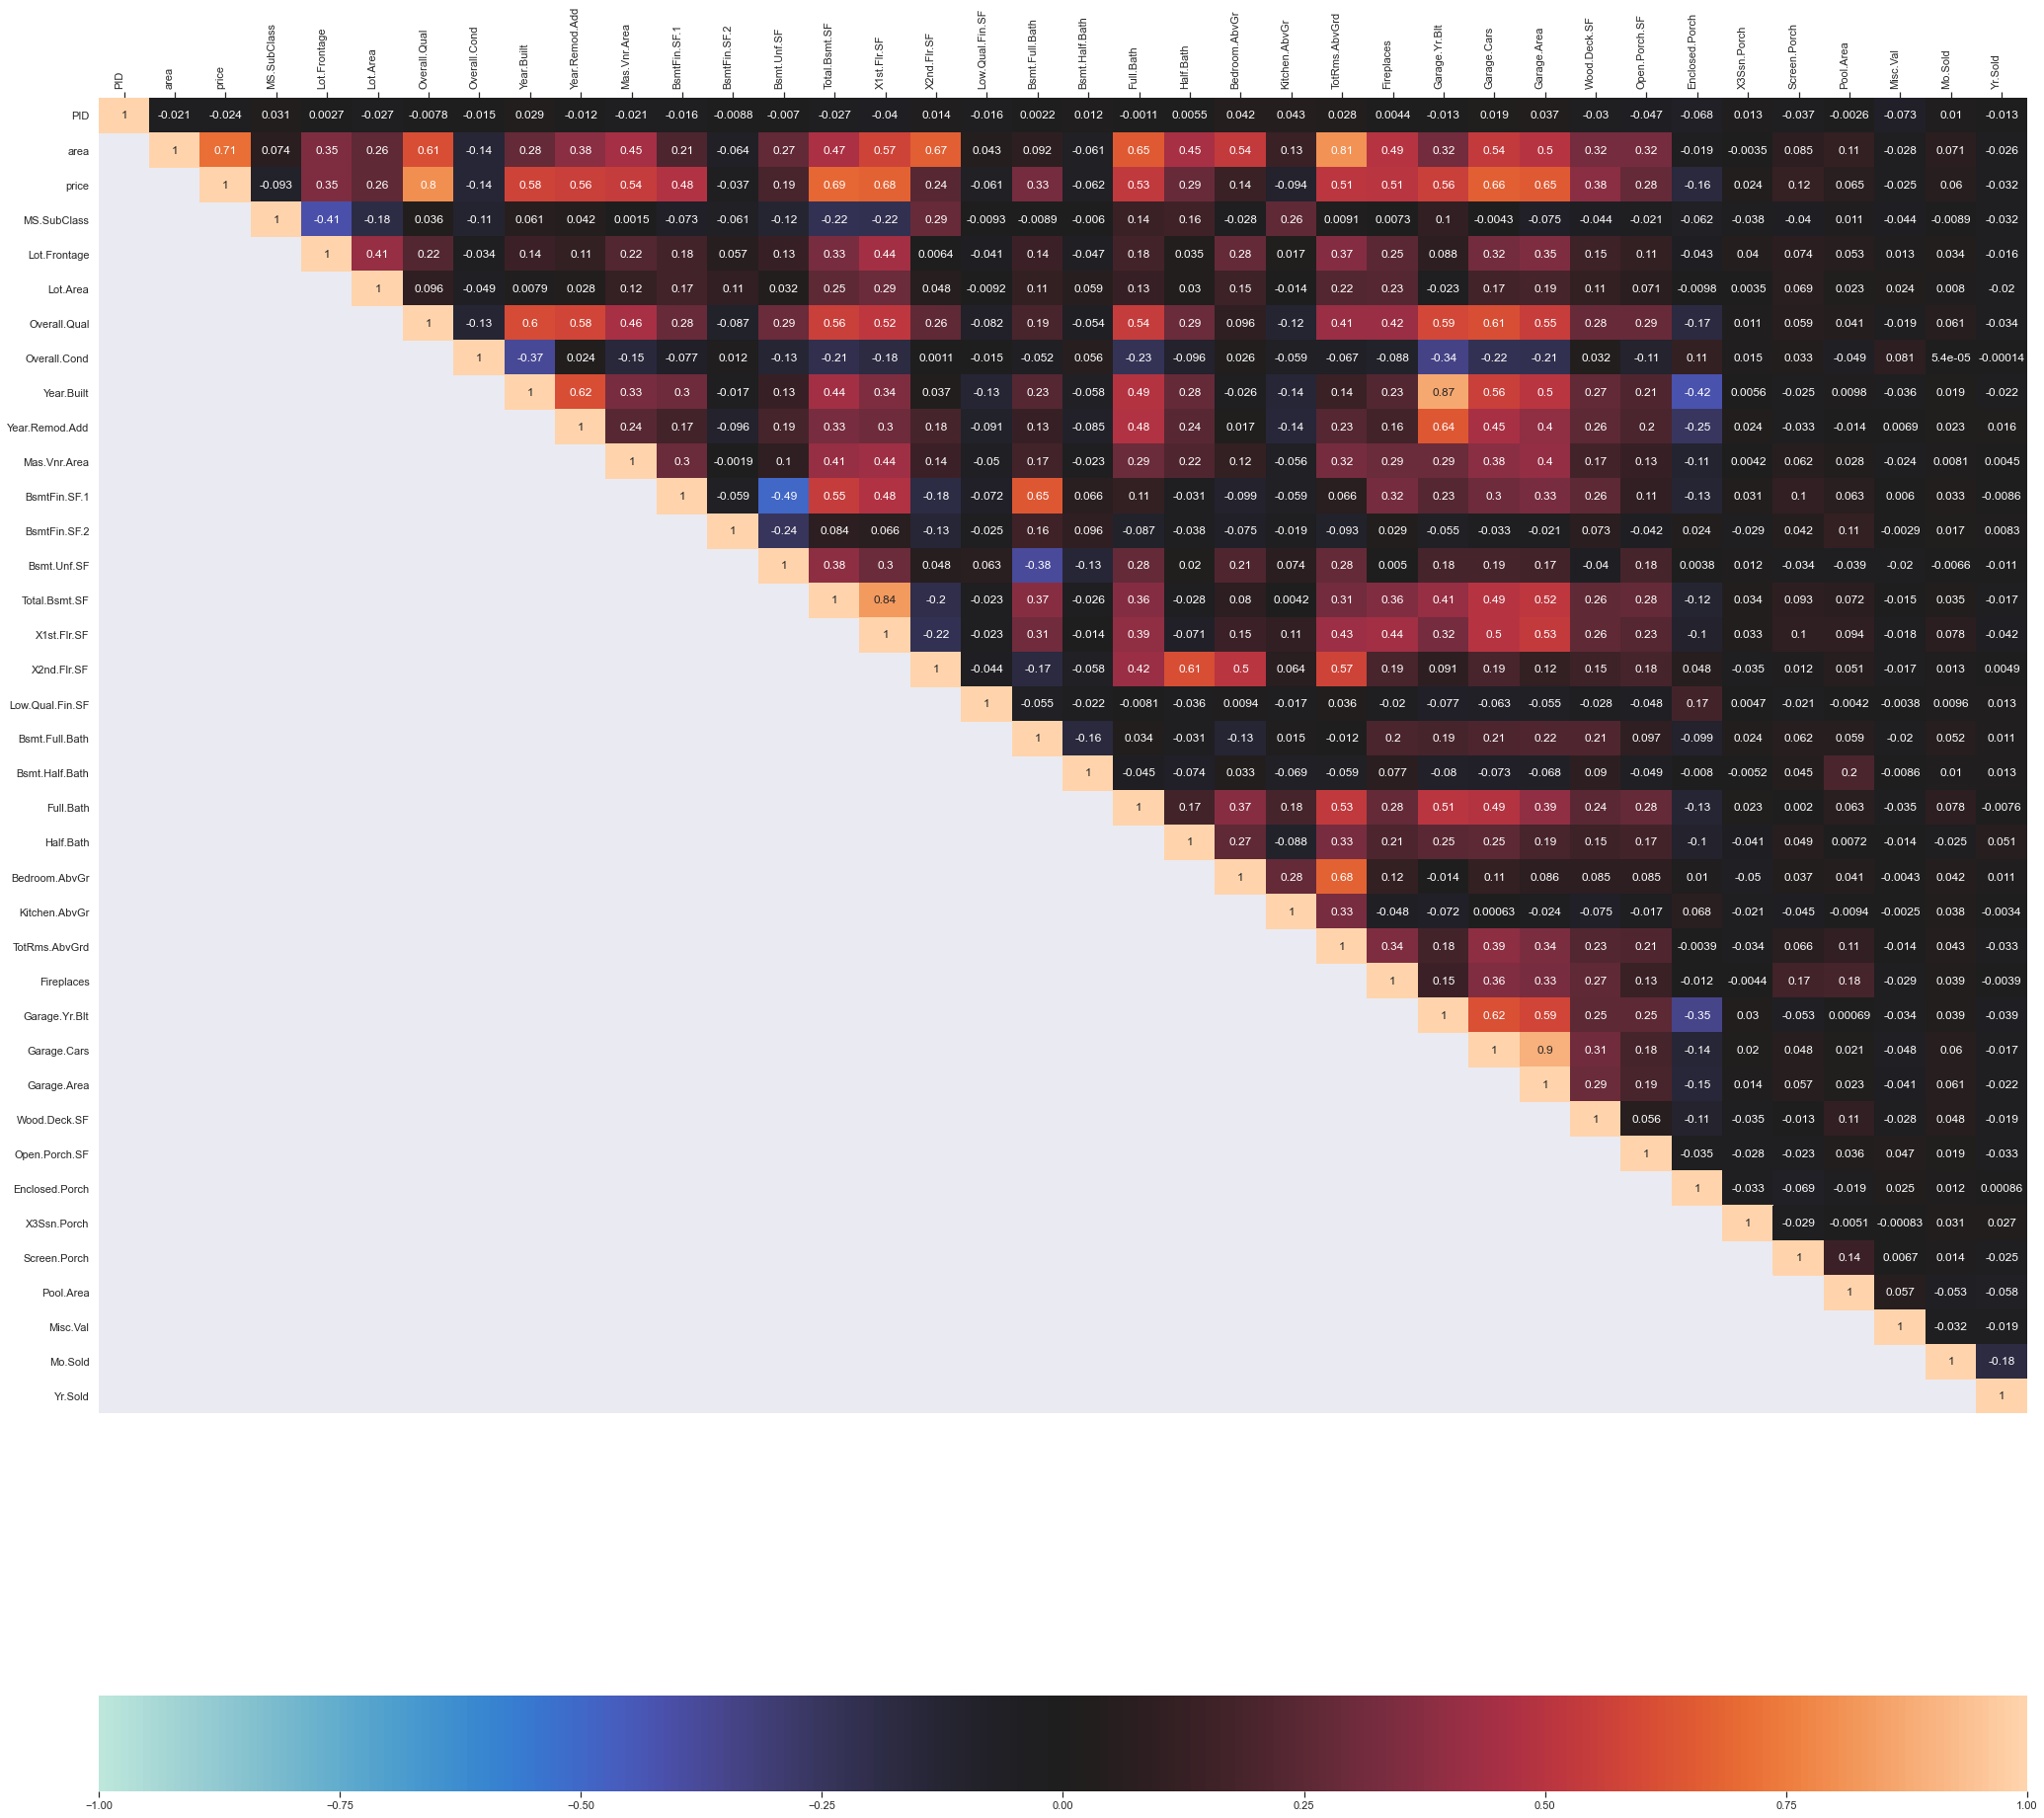

In [20]:
corrMatrix = df_train.corr(method='pearson')
mask = np.tri(corrMatrix.shape[0], k=-1)



ax = plt.subplots(figsize=(35, 35))
ax = sns.heatmap(
    corrMatrix,
    mask=mask,
    cbar_kws= {'orientation': 'horizontal'},
    annot=True, 
    vmin=-1, vmax=1, center=0,

)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);



>  It allows us to evaluate the strength and direction of the linear relationship between variables (Pearson method) and what are the most important variables that influence the price. With this graph we can get some important information:
>  *   Housing price has a strong positive relationship with the Overall Quality, area, Total.Bsmt.SF, X1st.Flr.SF, Garage.Cars and others
>  *   Some columns have high correlation as 'Garage.Area' and 'Garage.Cars' (0.9 of correlation), 'TotRms.AbvGrd' with 'area'  (correlation of 0.81) and 'X1st.Flr.SF' and Total.Bsmt.SF that have 0.84 of correlation.
>  *   Quality seems to be the most important factor when people look for the houses.

> We can also see using the correlation matrix the list of values that most influence a variable, as follows for the price:





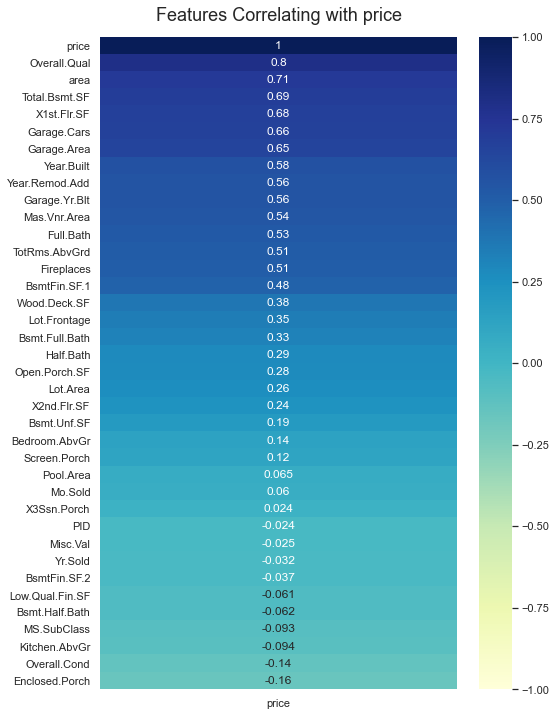

In [21]:
# Correlation for price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrMatrix[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);

### Scatter plot set

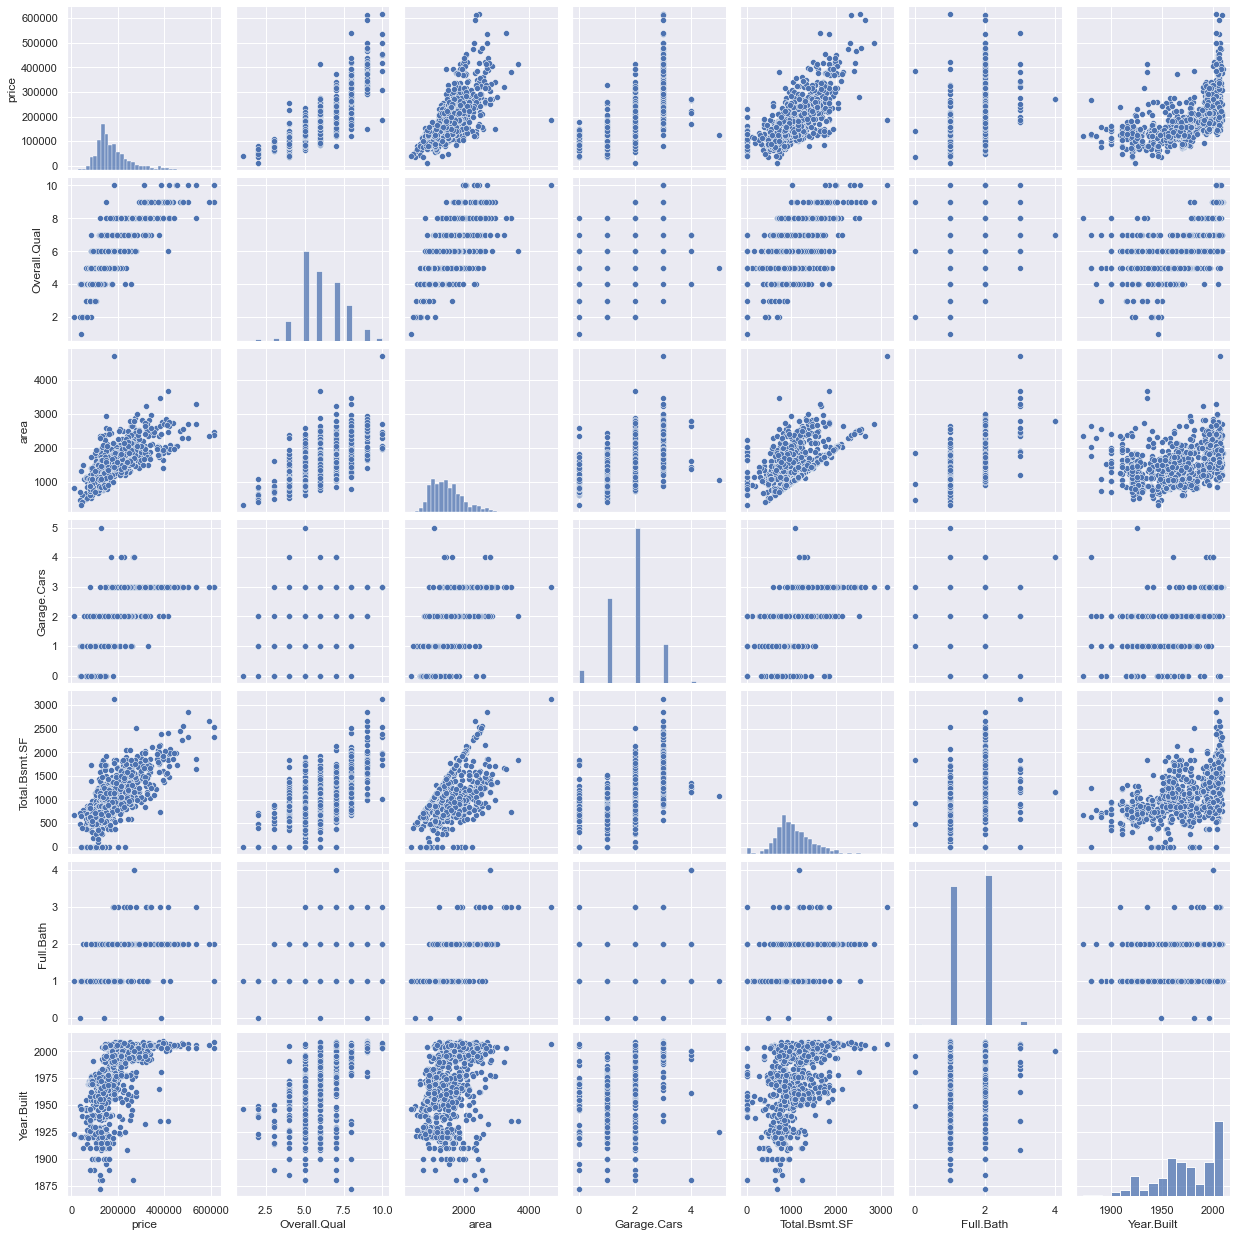

In [22]:
#scatterplot
sns.set()
cols = ['price', 'Overall.Qual', 'area', 'Garage.Cars', 'Total.Bsmt.SF', 'Full.Bath', 'Year.Built']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

> This set of graphics can gives us a reasonable idea about variables relationships.
>  *   For this set we select the variables with the greatest influence on the price present in the correlation matrix. 
>  *   We can visualize, in the first row, the linearity of the features ('area', 'Oveall.Qual', 'Total.Bsmt.SF', 'Garage.Cars' and 'Full.Bath') varying with the price in a positive way.
>  *   The plot of 'price' and 'Year.Built' also has some interesting features. Presenting a behavior very close to an exponential function, with the prices of new houses tending to a higher price. 
>  *   Another figure that we might find interesting is the one between 'Total.Bsmt.SF' and 'area'. The dots draw a line that makes sense when we imagine that a basement will normally not be larger than the upper floor.



### Boxplot for categorical

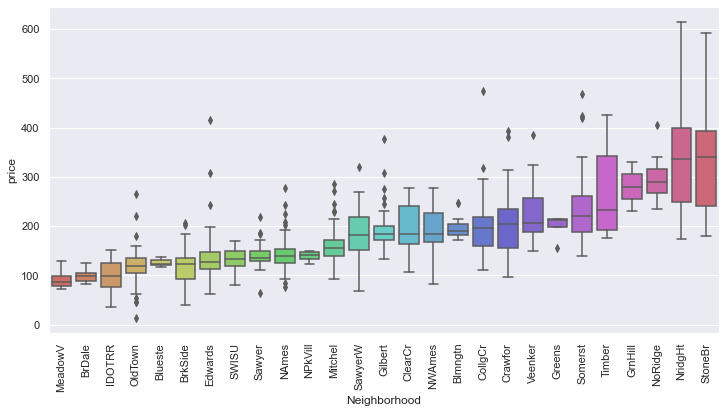

In [23]:
# Evaluating the prices by Neighborhood: 
grouped = df_train.loc[:,['Neighborhood', 'price']] \
    .groupby(['Neighborhood']) \
    .median() \
    .sort_values(by='price')

plt.figure(figsize=(12,6))
sns.boxplot(x=df_train['Neighborhood'], y=df_train['price']/1000, order=grouped.index, palette="hls")
plt.xticks(rotation=90);
plt.show()



>  Neighborhood variable plays an important role in determining the price of the house. The boxplot shows the price distribution in multiples of 1000 in the various neighborhoods. MeadowV is the least expensive locality while StoneBr is the most expensive. Also, the graphic indicates that the variation in the house price is also quite significant in the StoneBr, NridgHt localities though they are one of the most expensive localities.





### Scatter plot for Overall.Qual and price

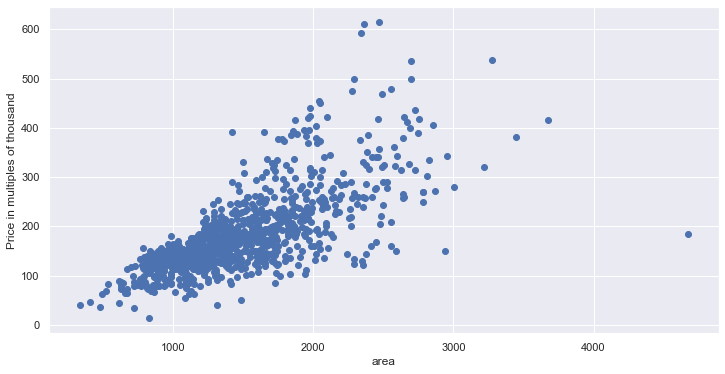

In [24]:

# Showing The area influence over price

plt.figure(figsize=(12,6))
plt.scatter(x=df_train['area'], y=df_train['price']/1000)
plt.ylabel('Price in multiples of thousand')
plt.xlabel('area')
plt.show()



> With this graph in particular that presents the numeric variable with the greatest interaction with the price ('area') we can visualize the presence of outliers in the data, which in this case presents only a value with a high area and low cost.



### Price distribution and Probability Plot


 mi = 181.19 and sigma = 81.87



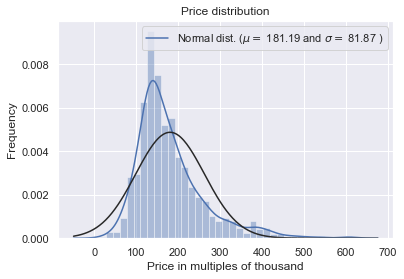

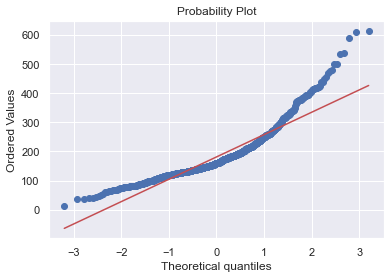

In [25]:
sns.distplot(df_train['price']/1000, fit=norm);
plt.xlabel('Price in multiples of thousand')
# Get the fitted parameters used by the function
(mi, sigma) = norm.fit(df_train['price']/1000)
print( '\n mi = {:.2f} and sigma = {:.2f}\n'.format(mi, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mi, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['price']/1000, plot=plt)
plt.show()




> The combination of these two graphs describes how the price data is distributed, which is our variable of interest. We can see how much this variable deviates from a normal distribution (through the values of mi and sigma that correspond to the mean and standard deviation respectively). With the porbility plot we have a line that corresponds to the normal distribution and the behavior of the data in relation to that line.

> These graphs are of great importance when we want to perform transformations and linearizations in the data which in this case can be improved by applying a log as in the figure below






In [26]:
#applying log transformation
df_train['price'] = np.log(df_train['price'])
df_test['price'] = np.log(df_test['price'])


 mi = 0.01 and sigma = 0.00



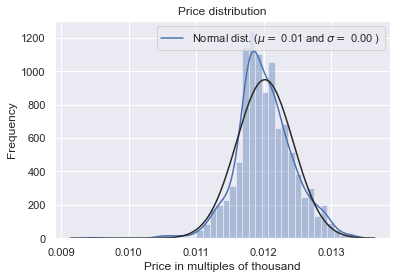

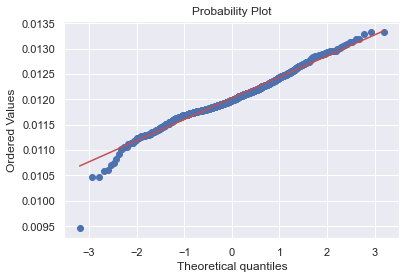

In [27]:
sns.distplot(df_train['price']/1000, fit=norm);
plt.xlabel('Price in multiples of thousand')
# Get the fitted parameters used by the function
(mi, sigma) = norm.fit(df_train['price']/1000)
print( '\n mi = {:.2f} and sigma = {:.2f}\n'.format(mi, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mi, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['price']/1000, plot=plt)
plt.show()


# Assignment - Predicting house prices

In building a model, it is often useful to start by creating a simple, intuitive initial model based on the results of the exploratory data analysis. 

You may feel like showcasing more advanced statistical skills. For this reason, we are providing testing data on *ames_test* data set so you can build a very simple model in order to predict the house prices given the data available on training data set. Use your imagination and let 

Note: The goal is not to identify the “best” possible model but rather to choose a reasonable and understandable starting point.

### Data processing:

#### Check for duplicates:

In [28]:
#check for dupes for PID
idsUnique = len(set(df_train.PID))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
df_train.drop(['PID'],axis =1,inplace=True)

0


In [29]:
#check for dupes for PID
idsUnique = len(set(df_test.PID))
idsTotal = df_test.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
df_test.drop(['PID'],axis =1,inplace=True)

0


#### Missing Data:



> Missing Data can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.



In [30]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Pool.QC,997,0.997
Misc.Feature,971,0.971
Alley,933,0.933
Fence,798,0.798
Fireplace.Qu,491,0.491
Lot.Frontage,167,0.167
Garage.Yr.Blt,48,0.048
Garage.Qual,48,0.048
Garage.Cond,48,0.048
Garage.Finish,48,0.048


In [31]:
#missing data
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Pool.QC,814,0.996328
Misc.Feature,785,0.960832
Alley,769,0.941248
Fence,651,0.796818
Fireplace.Qu,361,0.441860
Lot.Frontage,162,0.198286
Garage.Cond,37,0.045288
Garage.Qual,37,0.045288
Garage.Finish,37,0.045288
Garage.Yr.Blt,37,0.045288




> **We have two ways of dealing with missing data:**
1.   Drop the columns:
> >   Considering:
> >   *   Columns with more than 15% of data missing, it is very difficult to fill the missing data for this type of cases.
> >   *   Remove complementary variables as 'Garage.Area' that is complementary with 'Garage.Cars' (0.9 of correlation), 'TotRms.AbvGrd' that have a correlation with 'area' of 0.81 and X1st.Flr.SF complementary to Total.Bsmt.SF that have 0.84 of correlation.
> >   *   Remove variables **GarageX** and **BsmtX**, since the most important information regarding garages and Bsmt is expressed by 'Garage.Cars' and 'Total.Bsmt.SF'.
> >   *   Regarding **'MasVnrArea'** and **'MasVnrType'**, we could consider that these variables have a high correlation with Overall.Qual and area. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'. 
> >   * Drop the row with missing 'Garage.Cars' and 'Total.Bsmt.SF'.
2.    Fill the data:
> > We impute them by proceeding sequentially through features with missing values:
> >   *   Pool.QC -> NA means "No Pool"
> >   *   Misc.Feature -> NA means "no misc feature"
> >   *   Alley -> NA means "no alley access"
> >   *   Fence -> NA means "no fence"
> >   *   Fireplace.Qu -> NA means "no fireplace"
> >   *   Lot.Frontage -> fill in missing values by the median LotFrontage of the neighborhood.
> >   *   Garage.Qual, Garage.Finish, Garage.Cond, Garage.Type -> Replacing missing data with None
> >   *   Garage.Cars, Garage.Yr.Blt, Garage.Area -> Replacing missing data with 0 (Since No garage = no cars in such garage.)
> >   *   Bsmt.Exposure, Bsmt.Qual, Bsmt.Cond, BsmtFin.Type.1, BsmtFin.Type.2 -> NaN means that there is no basement
> >   *   BsmtFin.SF.1, BsmtFin.SF.2, Bsmt.Full.Bath, Bsmt.Half.Bath, Bsmt.Unf.SF -> missing values are likely zero for having no basement
> >   *   Mas.Vnr.Area, Mas.Vnr.Type -> We can fill 0 for the area and None for the type.
> >   *   Total.Bsmt.SF -> Replacing missing data with 0

>  **The two forms will be presented below, but we will only use the filling method:**




##### Fill Data:

In [32]:
df_train["Pool.QC"] = df_train["Pool.QC"].fillna("None")
df_train["Misc.Feature"] = df_train["Misc.Feature"].fillna("None")
df_train["Alley"] = df_train["Alley"].fillna("None")
df_train["Fence"] = df_train["Fence"].fillna("None")
df_train["Fireplace.Qu"] = df_train["Fireplace.Qu"].fillna("None")
df_train["Lot.Frontage"] = df_train.groupby("Neighborhood")["Lot.Frontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('Garage.Qual', 'Garage.Finish', 'Garage.Cond', 'Garage.Type' ):
    df_train[col] = df_train[col].fillna('None')

for col in ('Garage.Cars', 'Garage.Yr.Blt', 'Garage.Area'):
    df_train[col] = df_train[col].fillna(0)

for col in ('BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Bsmt.Unf.SF','Total.Bsmt.SF'):
    df_train[col] = df_train[col].fillna(0)

for col in ('Bsmt.Exposure', 'Bsmt.Qual', 'Bsmt.Cond', 'BsmtFin.Type.1', 'BsmtFin.Type.2' ):
    df_train[col] = df_train[col].fillna('None')

df_train["Mas.Vnr.Type"] = df_train["Mas.Vnr.Type"].fillna("None")
df_train["Mas.Vnr.Area"] = df_train["Mas.Vnr.Area"].fillna(0)


### For test set:
df_test["Pool.QC"] = df_test["Pool.QC"].fillna("None")
df_test["Misc.Feature"] = df_test["Misc.Feature"].fillna("None")
df_test["Alley"] = df_test["Alley"].fillna("None")
df_test["Fence"] = df_test["Fence"].fillna("None")
df_test["Fireplace.Qu"] = df_test["Fireplace.Qu"].fillna("None")
df_test["Lot.Frontage"] = df_test.groupby("Neighborhood")["Lot.Frontage"].transform(lambda x: x.fillna(x.median()))

for col in ('Garage.Qual', 'Garage.Finish', 'Garage.Cond', 'Garage.Type' ):
    df_test[col] = df_test[col].fillna('None')

for col in ('Garage.Cars', 'Garage.Yr.Blt', 'Garage.Area'):
    df_test[col] = df_test[col].fillna(0)

for col in ('BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Bsmt.Unf.SF','Total.Bsmt.SF'):
    df_test[col] = df_test[col].fillna(0)

for col in ('Bsmt.Exposure', 'Bsmt.Qual', 'Bsmt.Cond', 'BsmtFin.Type.1', 'BsmtFin.Type.2' ):
    df_test[col] = df_test[col].fillna('None')

df_test["Mas.Vnr.Type"] = df_test["Mas.Vnr.Type"].fillna("None")
df_test["Mas.Vnr.Area"] = df_test["Mas.Vnr.Area"].fillna(0)


In [33]:
df_train.isnull().sum().max()

2

In [34]:
df_test.isnull().sum().max()

1

we are left with 3 entries in Lot.Frontage with empty values, this can happen when we do not have other houses for sale in the same neighborhood so for this example we will use an overall average of all houses for these 3 entries. Usually it would be appropriate to assess the importance of these entries and remove them.

In [35]:
df_train["Lot.Frontage"] = df_train["Lot.Frontage"].transform(lambda x: x.fillna(x.median()))
df_test["Lot.Frontage"] = df_test["Lot.Frontage"].transform(lambda x: x.fillna(x.median()))

##### Remove Data:

In [36]:
# # droping data with more than 15% of missing values
# df_train = df_train.drop(['Pool.QC','Misc.Feature','Alley', 'Fence', 'Fireplace.Qu', 'Lot.Frontage'], axis=1)
# # Drop complementary columns
# df_train = df_train.drop(['Garage.Area', 'TotRms.AbvGrd', 'X1st.Flr.SF'], axis=1)

# df_train.shape

In [37]:
# df_train = df_train.drop(['Garage.Qual', 'Garage.Yr.Blt', 'Garage.Finish','Garage.Cond','Garage.Type'], axis=1)
# df_train = df_train.drop(['Bsmt.Qual', 'Bsmt.Exposure', 'BsmtFin.Type.1','Bsmt.Cond','BsmtFin.Type.2','Bsmt.Unf.SF','Bsmt.Full.Bath'], axis=1)

# df_train = df_train.drop(['Mas.Vnr.Area','Mas.Vnr.Type'], axis=1)

# df_train.shape

In [38]:
# df_train.isnull().sum().max() #checking that there's no missing data missing

In [39]:
# #dealing with missing data
# df_train = df_train.drop(df_train.loc[df_train['Garage.Cars'].isnull()].index)
# df_train = df_train.drop(df_train.loc[df_train['Total.Bsmt.SF'].isnull()].index)
# df_train.isnull().sum().max() #just checking that there's no missing data missing...

#### Outliars:

outliers can affect our models and can be a valuable source of information, providing us insights about specific behaviours.

To check outliers we will do a quick analysis with scatter plot, verifying the behavior of the data:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'log(price)')

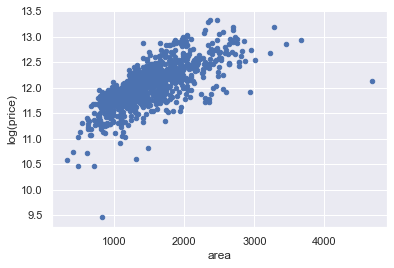

In [40]:
## Scatter plot area x log(price)
var = 'area'
data = pd.concat([df_train['price'], df_train[var]], axis=1)

data.plot.scatter(x=var, y='price')
plt.ylabel('log(price)')

we have a point standing out outside the standard of data with high area and low price. It is possible that the price was set lower to sell faster or even if the property is in a neighborhood with lower prices, to verify this type of behavior we could evaluate the houses in the neighborhood

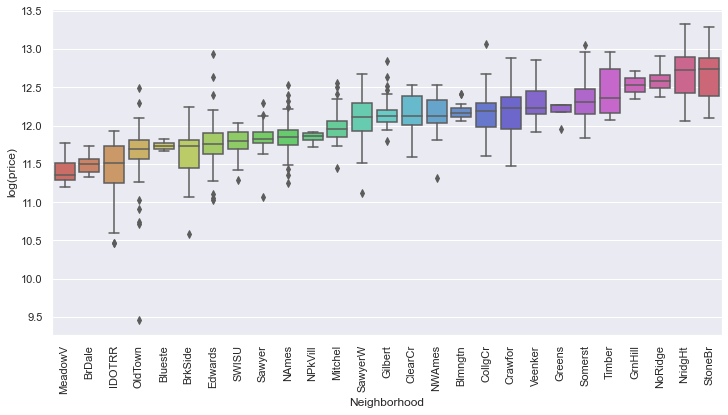

In [41]:
# Evaluating the prices by Neighborhood: 
grouped = df_train.loc[:,['Neighborhood', 'price']] \
    .groupby(['Neighborhood']) \
    .median() \
    .sort_values(by='price')

plt.figure(figsize=(12,6))
sns.boxplot(x=df_train['Neighborhood'], y=df_train['price'], order=grouped.index, palette="hls")
plt.ylabel('log(price)')
plt.xticks(rotation=90);
plt.show()

In [42]:
neigh = df_train['Neighborhood'].loc[(df_train['area']>3500)]
neigh

309    Edwards
388    Edwards
Name: Neighborhood, dtype: object

In [43]:
df_neigh = df_train.loc[(df_train['Neighborhood']=='Edwards')]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'log(price)')

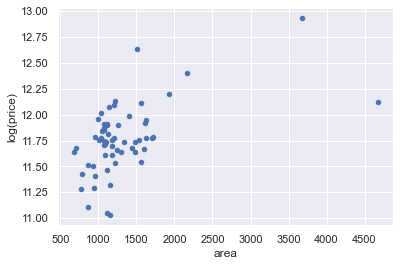

In [44]:
## Scatter plot log(price) x area for Edwards Neighborhood
var = 'area'
data = pd.concat([df_neigh['price'], df_neigh[var]], axis=1)
data.plot.scatter(x=var, y='price')
plt.ylabel('log(price)')

we can verify that it is a neighborhood with low-average prices, but with most land areas below 2500, we have two properties with more than 2500 and the point with more than 4000 does not follow the linear behavior of the rest of the data, so we can remove it.

In [45]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['area']>4000) & (df_train['price']<300000)].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'log(price)')

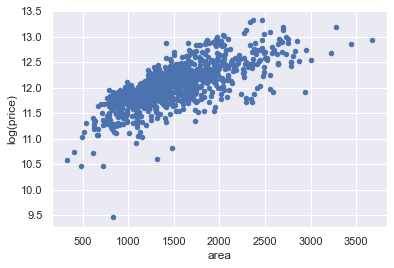

In [46]:
## Scatter plot log(price) x area
var = 'area'
data = pd.concat([df_train['price'], df_train[var]], axis=1)

data.plot.scatter(x=var, y='price')
plt.ylabel('log(price)')

#### Convert categorical to dummies:

We will combine the datasets to select the dummy variables, thus avoiding that the two datasets are left with different number of columns. It is worth remembering that the order of the lines will not be changed and after coding the variables we will divide the datasets again.

In [47]:
df_train.shape, df_test.shape

((999, 80), (817, 80))

In [48]:
result = pd.concat([df_train, df_test], axis=0, join='inner')
result.shape

(1816, 80)

In [49]:
## Train:
categorical_features = result.select_dtypes(include = ["object"]).columns
numerical_features = result.select_dtypes(exclude = ["object"]).columns
df_num = result[numerical_features]
df_cat = result[categorical_features]

df_cat = pd.get_dummies(df_cat)
print(str(df_cat.isnull().values.sum()))

df2 = pd.concat([df_num, df_cat],axis=1)


0


In [50]:
df_train2 = df2.iloc[:999,:]
df_test2 = df2.iloc[999:,:]

### Modeling:



> We will be testing 3 models:
1.   Gradient Boosting Regression 
2.   Xgboost
3.   LightGBM



In [51]:
train_y = df_train2['price']
train_X = df_train2.drop(['price'], axis=1)
test_y = df_test2['price']
test_X = df_test2.drop(['price'], axis=1)


In [52]:
train_y.shape, train_X.shape, test_y.shape, test_X.shape

((999,), (999, 303), (817,), (817, 303))

#### Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [53]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [54]:
GBoost.fit(train_X, train_y)
GBoost_train_pred = GBoost.predict(train_X)
GBoost_pred = GBoost.predict(test_X)
print("Mean Squared Error Train: " + str(mean_squared_error(GBoost_train_pred, train_y)))
print("Mean Squared Error Test: " + str(mean_squared_error(GBoost_pred, test_y)))

Mean Squared Error Train: 0.0036390625803768176
Mean Squared Error Test: 0.010779842687345349


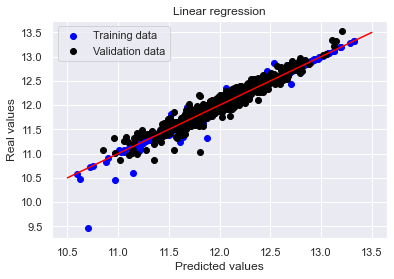

In [55]:
# Plot predictions - Real values
plt.scatter(GBoost_train_pred, train_y, c = "blue",  label = "Training data")
plt.scatter(GBoost_pred, test_y, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

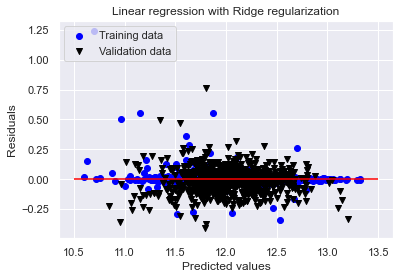

In [56]:
# Plot residuals
plt.scatter(GBoost_train_pred, GBoost_train_pred - train_y, c = "blue",  label = "Training data")
plt.scatter(GBoost_pred, GBoost_pred - test_y, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

#### XGBoost:

In [57]:


XGboost = XGBRegressor()
XGboost = XGBRegressor(n_estimators=1000, learning_rate=0.05, objective='reg:squarederror', loss='huber')
XGboost.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

[09:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "loss" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, loss='huber', max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
# make predictions
XGboost_train_pred = XGboost.predict(train_X)
XGboost_test_pred = XGboost.predict(test_X)
print("Mean Squared Error Train: " + str(mean_squared_error(XGboost_train_pred, train_y)))
print("Mean Squared Error Test: " + str(mean_squared_error(XGboost_test_pred, test_y)))

Mean Squared Error Train: 0.0009651457700259027
Mean Squared Error Test: 0.010605788694609508


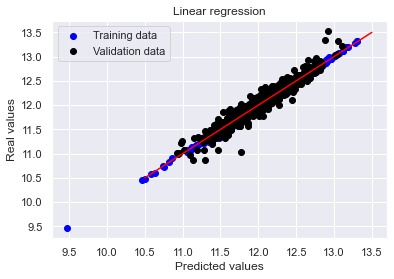

In [59]:
# Plot predictions - Real values
plt.scatter(XGboost_train_pred, train_y, c = "blue",  label = "Training data")
plt.scatter(XGboost_test_pred, test_y, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

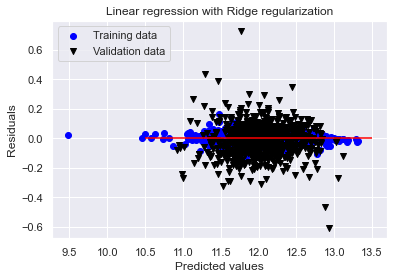

In [60]:
# Plot residuals
plt.scatter(XGboost_train_pred, XGboost_train_pred - train_y, c = "blue",  label = "Training data")
plt.scatter(XGboost_test_pred, XGboost_test_pred - test_y, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

#### LightGBM :

In [61]:
LightGBM = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [62]:
LightGBM.fit(train_X, train_y)
LightGBM_train_pred = LightGBM.predict(train_X)
LightGBM_pred = LightGBM.predict(test_X)
print("Mean Squared Error Train: " + str(mean_squared_error(LightGBM_train_pred, train_y)))
print("Mean Squared Error Test: " + str(mean_squared_error(LightGBM_pred, test_y)))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Mean Squared Error Train: 0.004566607778025606
Mean Squared Error Test: 0.011234878112524917


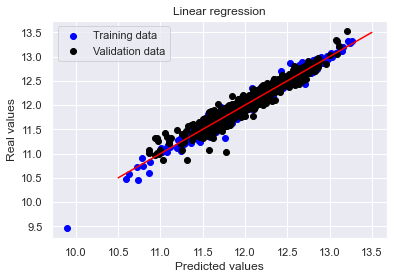

In [63]:
# Plot predictions - Real values
plt.scatter(LightGBM_train_pred, train_y, c = "blue",  label = "Training data")
plt.scatter(LightGBM_pred, test_y, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

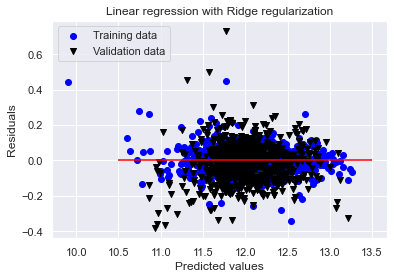

In [64]:
# Plot residuals
plt.scatter(LightGBM_train_pred, LightGBM_train_pred - train_y, c = "blue",  label = "Training data")
plt.scatter(LightGBM_pred, LightGBM_pred - test_y, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()